In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns

Performing the EDA for the given dataset


In [2]:
df=pd.read_csv("IPL_Ball_by_Ball_2022.csv")
columns_to_drop = ['kind', 'non-striker', 'fielders_involved','player_out']
df.drop(columns_to_drop, axis = 1, inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        17912 non-null  int64 
 1   ID                17912 non-null  int64 
 2   innings           17912 non-null  int64 
 3   overs             17912 non-null  int64 
 4   ballnumber        17912 non-null  int64 
 5   batter            17912 non-null  object
 6   bowler            17912 non-null  object
 7   extra_type        1050 non-null   object
 8   batsman_run       17912 non-null  int64 
 9   extras_run        17912 non-null  int64 
 10  total_run         17912 non-null  int64 
 11  non_boundary      17912 non-null  int64 
 12  isWicketDelivery  17912 non-null  int64 
 13  BattingTeam       17912 non-null  object
dtypes: int64(10), object(4)
memory usage: 1.9+ MB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17912.0,8.955500e+03,5170.893346,0.0,4477.75,8955.5,13433.25,17911.0
ID,17912.0,1.304524e+06,1843.445952,1304047.0,1304065.00,1304084.0,1304102.00,1312200.0
innings,17912.0,1.485317e+00,0.499798,1.0,1.00,1.0,2.00,2.0
overs,17912.0,9.290085e+00,5.690914,0.0,4.00,9.0,14.00,19.0
batsman_run,17912.0,1.286958e+00,1.701842,0.0,0.00,1.0,1.00,6.0
extras_run,17912.0,7.497767e-02,0.372878,0.0,0.00,0.0,0.00,5.0
total_run,17912.0,1.361936e+00,1.688991,0.0,0.00,1.0,1.00,7.0
non_boundary,17912.0,1.674855e-04,0.012941,0.0,0.00,0.0,0.00,1.0
isWicketDelivery,17912.0,5.091559e-02,0.219831,0.0,0.00,0.0,0.00,1.0


In [21]:
df.shape

(17912, 14)

In [22]:
df.nunique()

Unnamed: 0          17912
ID                     74
innings                 2
overs                  20
ballnumber             10
batter                174
bowler                125
extra_type              4
batsman_run             6
extras_run              6
total_run               8
non_boundary            2
isWicketDelivery        2
BattingTeam            10
dtype: int64

In [23]:
df.isnull()

,Unnamed: 0,ID,innings,overs,ballnumber,batter,bowler,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,False,False,False,False,False,False,False,True,False,False,False,False,False,False
17908,False,False,False,False,False,False,False,True,False,False,False,False,False,False
17909,False,False,False,False,False,False,False,True,False,False,False,False,False,False
17910,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [19]:
df.tail()

,Unnamed: 0,ID,innings,overs,ballnumber,batter,bowler,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam
17907,17907,1312200,2,17,3,DA Miller,R Ashwin,NaN,1,0,1,0,0,Gujarat Titans
17908,17908,1312200,2,17,4,Shubman Gill,R Ashwin,NaN,0,0,0,0,0,Gujarat Titans
17909,17909,1312200,2,17,5,Shubman Gill,R Ashwin,NaN,1,0,1,0,0,Gujarat Titans
17910,17910,1312200,2,17,6,DA Miller,R Ashwin,NaN,2,0,2,0,0,Gujarat Titans
17911,17911,1312200,2,18,1,Shubman Gill,OC McCoy,NaN,6,0,6,0,0,Gujarat Titans


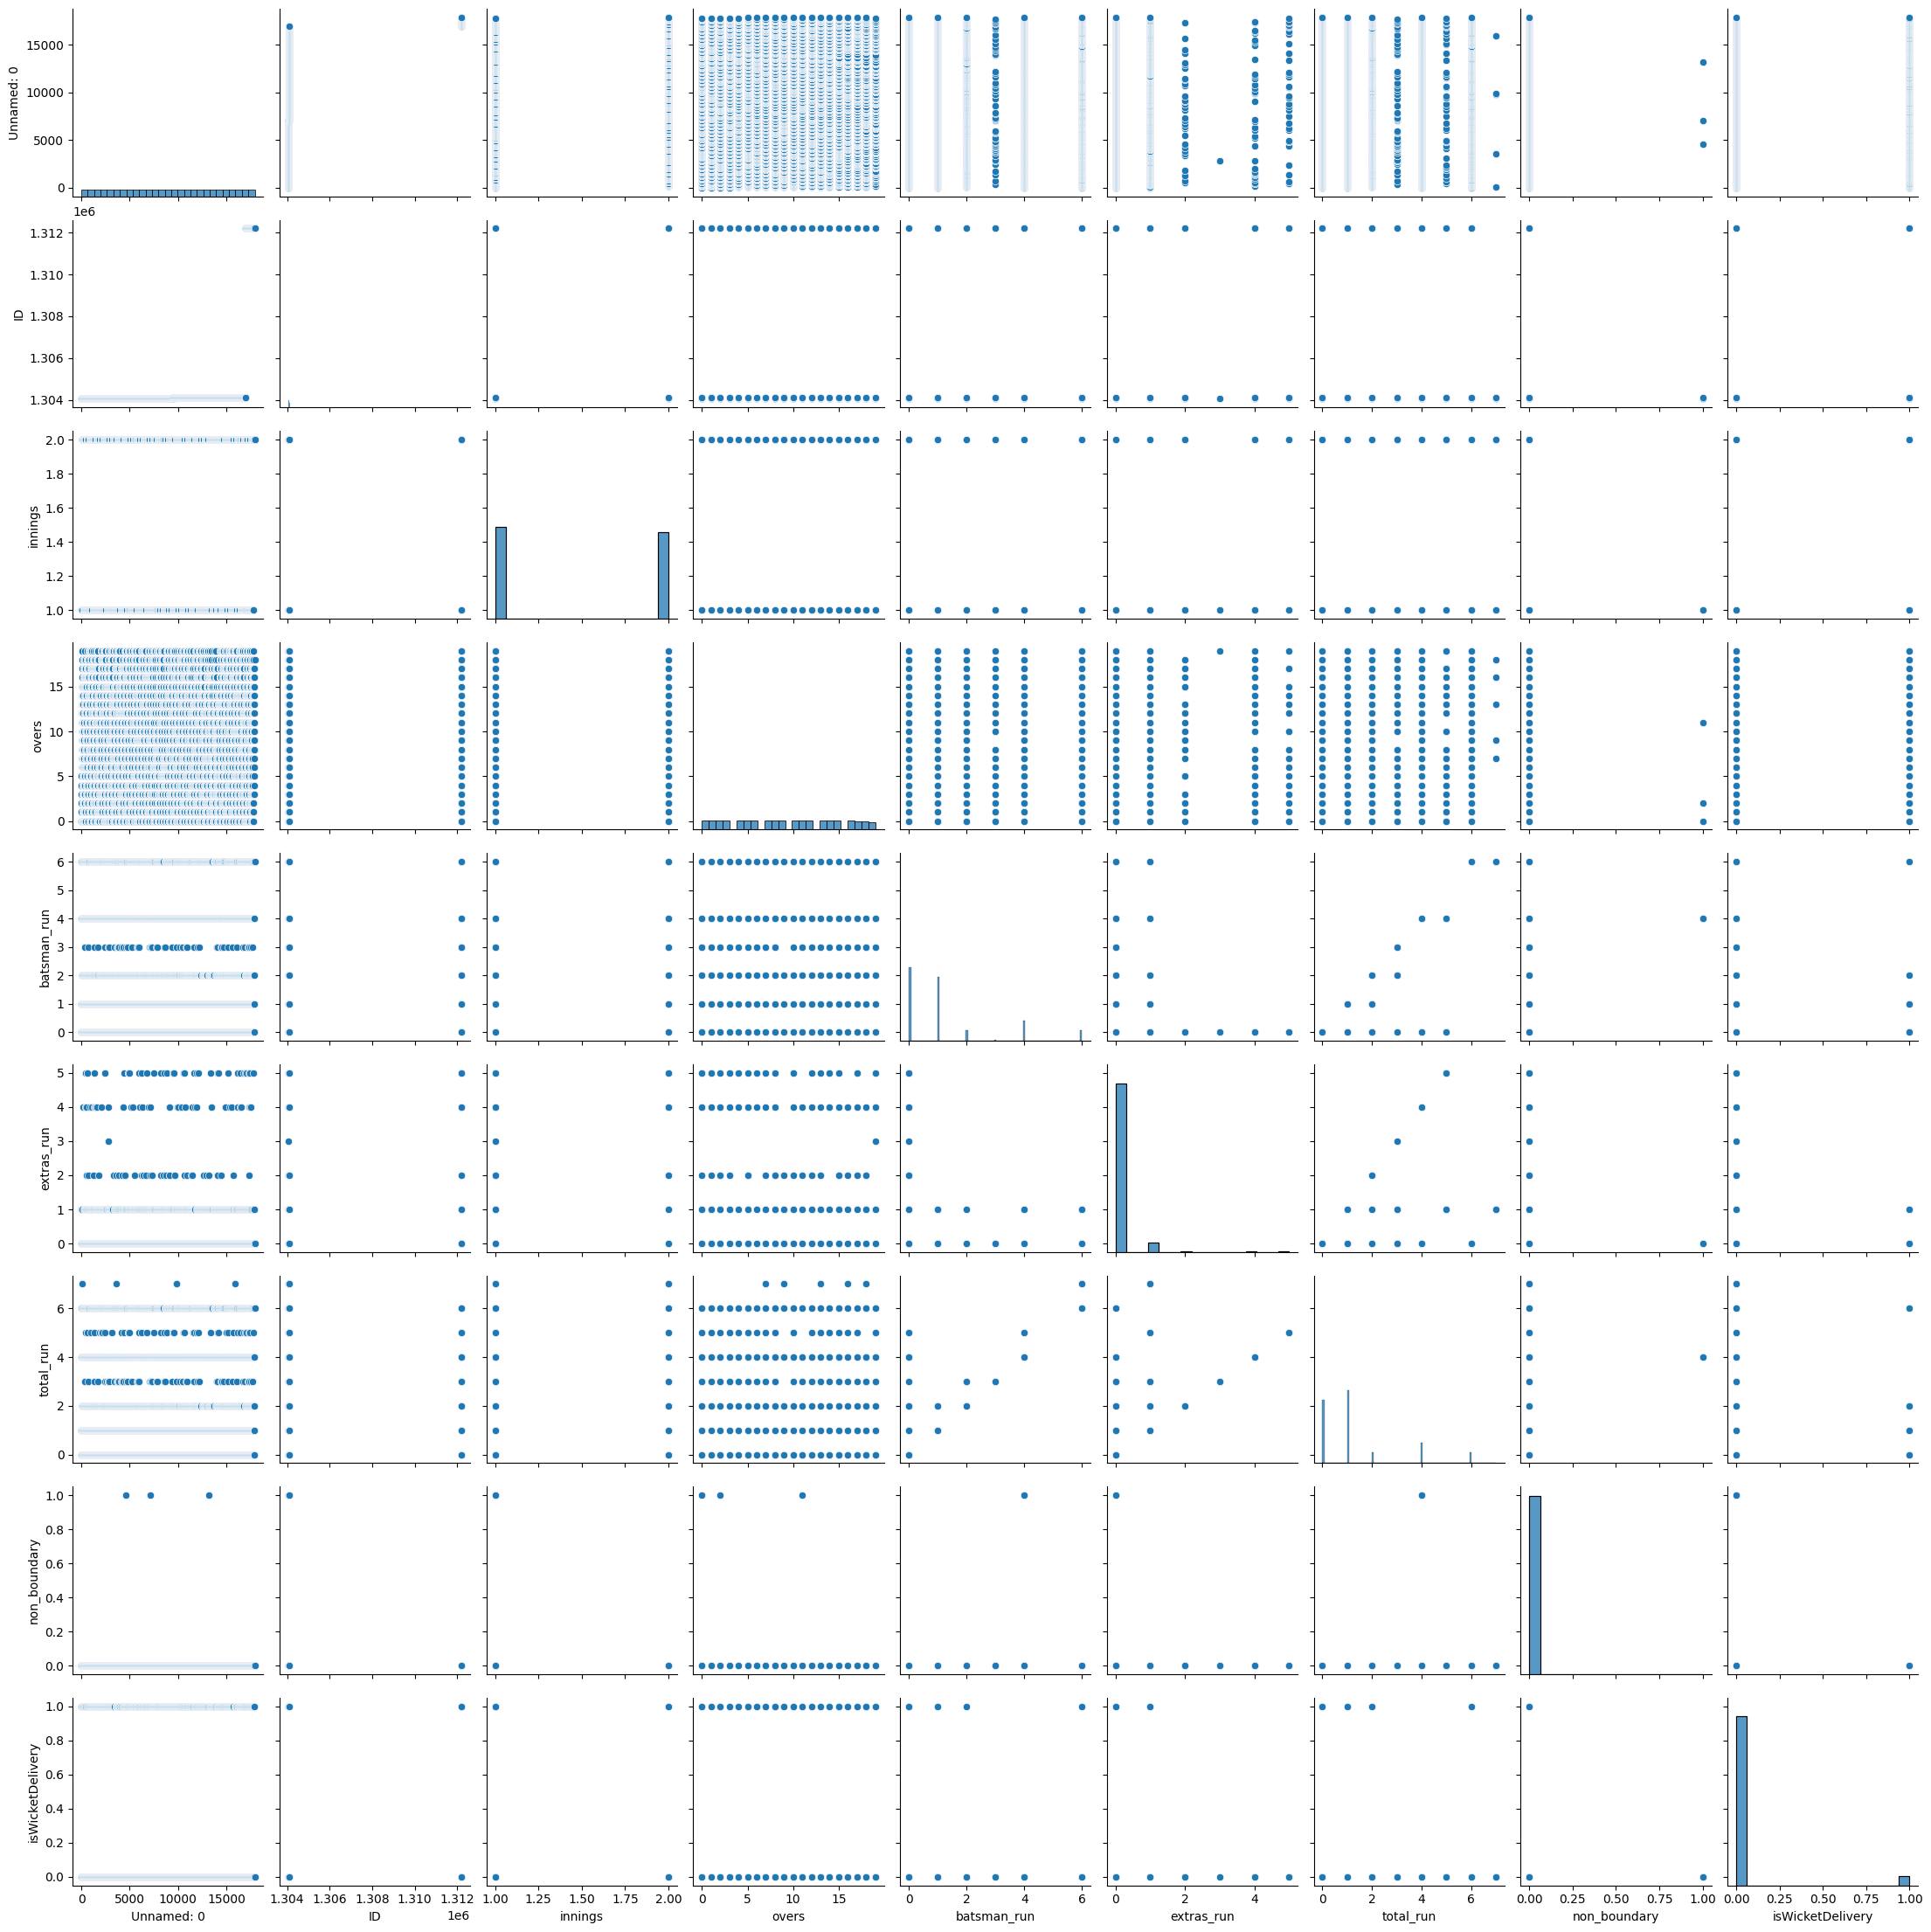

In [18]:
import seaborn as sns
sns.pairplot(df)

Encoding the nominal and ordinal variables

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
df['ballnumber'] = df['ballnumber'].astype('category')
encoder = OneHotEncoder(categories='auto')
df_encoded = pd.DataFrame(encoder.fit_transform(df[['ballnumber']]).toarray())
df_final = pd.concat([df, df_encoded], axis=1)


In [4]:
lab = LabelEncoder()
df_final['batter'] = lab.fit_transform(df_final['batter'])
df_final['bowler'] = lab.fit_transform(df_final['bowler'])
df_final['extra_type'] = lab.fit_transform(df_final['extra_type'])
print(df_final.head())
df_final.info()


   Unnamed: 0       ID  innings  overs ballnumber  batter  bowler  extra_type  \
0           0  1304047        1      0          1     124     115           2   
1           1  1304047        1      0          2     124     115           4   
2           2  1304047        1      0          3     124     115           3   
3           3  1304047        1      0          4     124     115           4   
4           4  1304047        1      0          5     124     115           4   

   batsman_run  extras_run  ...    0    1    2    3    4    5    6    7    8  \
0            0           1  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1            0           0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2            0           1  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3            0           0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4            0           0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

     9  
0  0.0  
1  0.0  
2  0.

Defining the features and output

In [5]:
X = df_final.drop('BattingTeam', axis = 1)
Y = df_final.BattingTeam
X.columns = X.columns.astype(str)
df_final.head()


,Unnamed: 0,ID,innings,overs,ballnumber,batter,bowler,extra_type,batsman_run,extras_run,...,0,1,2,3,4,5,6,7,8,9
0,0,1304047,1,0,1,124,115,2,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1304047,1,0,2,124,115,4,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1304047,1,0,3,124,115,3,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1304047,1,0,4,124,115,4,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1304047,1,0,5,124,115,4,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Spliting the set into training and test sets


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

K- Nearest Neighbour Classifier (KNN)
Creating the KNN model and training it with the dataset. Plotting the graph comparing the accuracy of training and test dataset
KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation.

It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points.

By choosing K, the user can select the number of nearby observations to use in the algorithm.

Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.


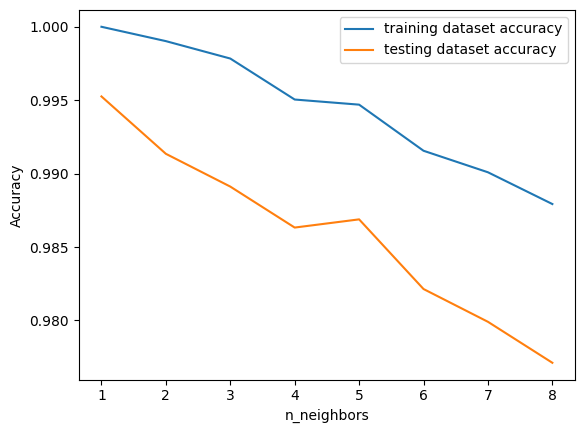

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  train_accuracy[i] = knn.score(X_train, Y_train)
  test_accuracy[i] = knn.score(X_test, Y_test)
plt.plot(neighbors, train_accuracy, label="training dataset accuracy")
plt.plot(neighbors, test_accuracy, label="testing dataset accuracy")
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()



The model has been predicted the score using the given input.


In [12]:
input = [['0', '1312200','1' ,'0' ,'1' ,'171', '66', '4','0','0' ,'0', '0', '0','1.0','0.0','0.0','0.0','0.0','0.0','0.0', '1.0','0.0','1.0']]
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder()
ct=ColumnTransformer(transformers=[('encoder',ohe,[0])],remainder='passthrough')
input = np.array(ct.fit_transform(input), dtype=np.float64)
predict=knn.predict(input)
print(predict)


['Chennai Super Kings']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


JUSTIFICATION: - When compared with the metric comparison of various models KNN performed well. When compared with other models like
linear regression, decision tree, Random Forest and XG boost regressors KNN had the best performance when compared based on mse, rmse.
So, KNN was chosen as the Machine learning model to predict the winning team's score.